In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['fivethirtyeight', 'figsize'])
_SAVEDIR_ = 'Tex/figures/'

In [ ]:
       Nsteps = 10000
       nout   = 200

       sizex  = 10.0
       dx     = sizex/float(nx-1)
       dif    = 1.0
       vel    = 0.0
       vamp   = 1.0   ! omega square
c -----------------------------------------------------
c CFL numbers fix the timestep
       cfl   = 0.10
       dtd   = 1.0
       if(dif.ne.0.0) dtd = dx*dx/dif
       dta   = 1.0
       if(vel.ne.0.0) dta = dx/vel
       dtc   = 1.0
       if(vamp.ne.0.0) dtc = 1.0/(vamp*sizex*sizex)
c pick up the safest dt           (play with them)
       dt    = cfl*min(min(dta,dtd),dtc)
       write(6,*) dx,dtd,dta,dtc,dt

       alfa   = vel*dt/dx

In [5]:
# Params
Nsteps = 1000
nx = 500
sizeX = 10
x = np.linspace(0,sizeX,nx)
f = np.zeros([Nsteps,nx])
dx = x[1]-x[0]


dif = 1
vel = 0
v_amp = 1.0 #omega**2

cfl = .1
if dif != 0:
    dtd = .5*dx**2/dif
else:
    dtd = 1.0
if vel != 0:
    dta = dx/vel
else:
    dta = 1
if v_amp != 0:
    dtc = 1/ (v_amp*sizeX**2)
else:
    dtc = 1

dt = cfl * np.min([dtd,dta,dtc])

alpha = vel*dt/dx
delta = dif*dt/(dx*dx)



In [ ]:
def _ADR_matrix_PBC(cfld, cfla, kappa, PHI, NX, Nsteps):
    """
    To get DR matrix, just set cfla = 0
    """

    a = cfld + cfla/2
    b = cfld - cfla/2
    c = 1-2*cfld + kappa

    T = np.zeros([NX,NX])
    T[0][0] = c
    T[-1][-1] = c
    
    T[0][1] = b
    T[-1][-2] = a
    
    T[0][-1] = a
    T[-1][0] = b
    
    for n in range(1,NX-1):
        T[n][n-1]=a
        T[n][n]=c
        T[n][n+1]=b
        
    f = np.zeros([Nsteps, NX])

    sizex = 1
    dx = 1. /NX
    x = np.linspace(0,1,NX)

    sigma = .1*sizex
    f[0][:] = np.exp(-.5*np.power((x[:]-sizex/2)/sigma,2))

    print(T)
    return T,f

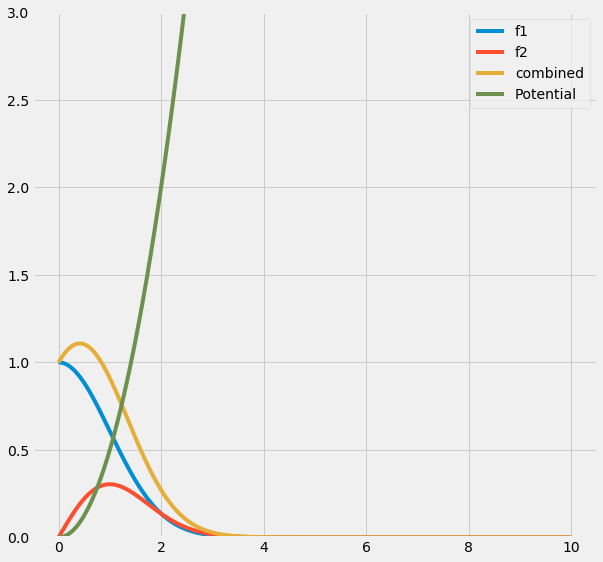

In [8]:
f1 = np.exp(-.5*x**2)
f2 = .5*x*np.exp(-.5*x**2)

plt.plot(x,f1,label='f1')
plt.plot(x,f2,label='f2')
plt.plot(x,f1+f2,label='combined')
plt.plot(x,.5*x**2,label='Potential')
plt.ylim([0,3])
plt.legend()
plt.show()

In [10]:
np.sum((f1+f2)*dx)

1.7633174435257633